# Homework 2.1
[15 May 2025]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import warnings
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gridspec

from sklearn.datasets import make_blobs

# $k$-Means Clustering

In [279]:
def kmeans(data, k, seed_init_cent = False, plot=False):
    # np.random.seed(random_seed) 
    dim = data.shape[1]
    points = data.shape[0]
    centroids = np.random.uniform(np.min(data), np.max(data), (k, dim))
    ids1 = np.ones(points) 
    ids2 = np.zeros(points)

    while np.array_equal(ids1, ids2) is False:
        ids1 = ids2.copy()
        for i in range(points):
            ids2[i] = np.argmin(np.linalg.norm(data[i,:] - centroids, axis=1))
        for j in range(k):
            if  np.any(ids2 == j):
                centroids[j,:] = data[ids2 == j].mean(axis=0)
    
    def visualize(data, ids2, k):
        for cluster in range(k):
            clusterdata = data[ids2 == cluster]
            plt.plot(clusterdata[:, 0], clusterdata[:,1], 'x')
        plt.plot(centroids[:,0], centroids[:, 1], 'o', color='black', markersize=3)
    
    if plot == True:
        visualize(data, ids2, k)
    
    return ids2, centroids

def visualize_ax(data, ids2, centroids, k, ax):
    for cluster in range(k):
        clusterdata = data[ids2 == cluster]
        ax.plot(clusterdata[:, 0], clusterdata[:, 1], 'x')
    ax.plot(centroids[:, 0], centroids[:, 1], 'o', color='black', markersize=3)
    ax.axis('equal')

I am creating a 300 data-points to be classified with k-means, in such a manner that they are distributed in 5 clusters, on a plane. 

## Number of Clusters
In most cases it is hard to predict the number of clusters prior, especially when dealing with higher dimensional data. Here I  can cheat, because I know the number of clusters prior. But as I tried to classify them into different number of clusters, the classifier fails. 

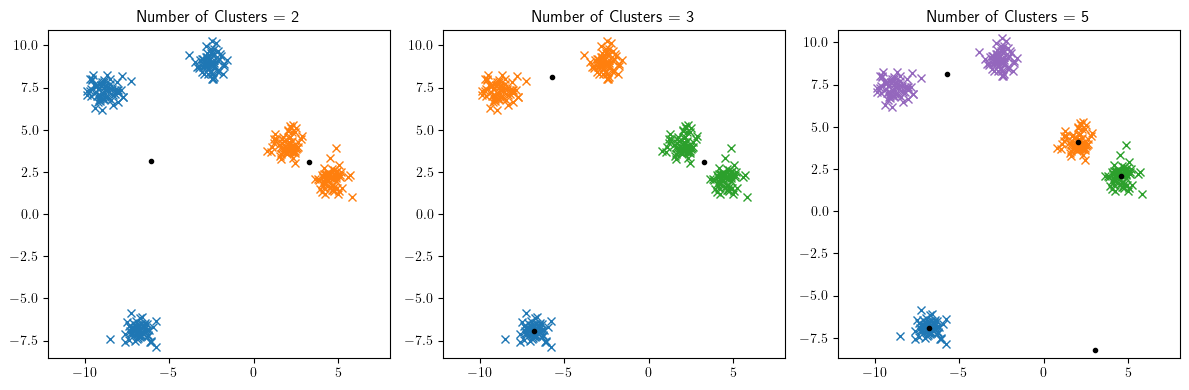

In [288]:
data, true_labels = make_blobs(n_samples=300, centers=5, cluster_std=0.5, random_state=42)
fig, axs = plt.subplots(1, 3, figsize=(12, 4)) 
ks = [2, 3, 5]

for i, k in enumerate(ks):
    ids2, centroids = kmeans(data, k, seed_init_cent= True)
    visualize_ax(data, ids2, centroids, k, axs[i])
    axs[i].set_title(f'Number of Clusters = {k}')

plt.tight_layout()
plt.show()

## Initial Choice of Centroids. 
The choice of first centroids, while initiating the algorithm influences the cluster formation heavily. To demonstrate the effect, I choose the centroids randomly using `centroids = np.random.uniform(np.min(data), np.max(data), (k, dim))` and then performs a k-means clustering. As the results of 3 different initial choices are shown below, the difference is evident. In some cases the program failed to identify the given number of clusters. An interesting artifact I noticed was that when a centroid lands exactly in the middle of two clusters, it doesn't move anymore. 

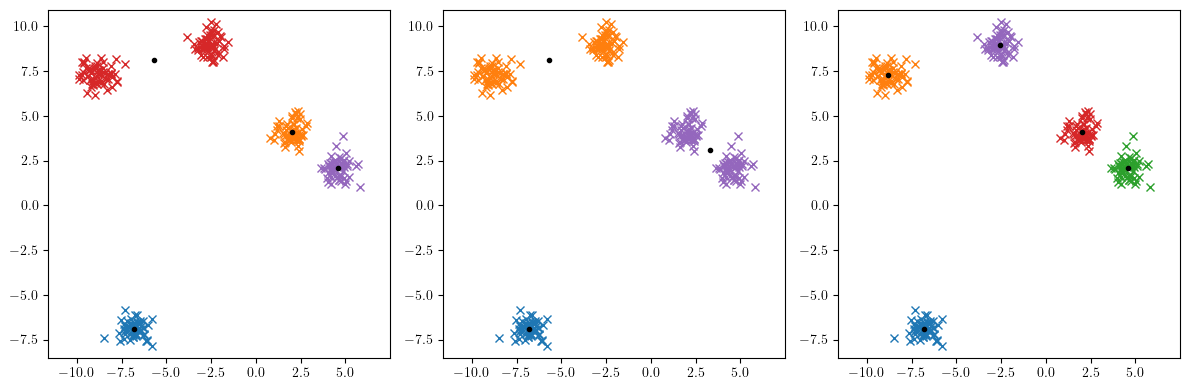

In [269]:
data, true_labels = make_blobs(n_samples=300, centers=5, cluster_std=0.5, random_state=42)
fig, axs = plt.subplots(1, 3, figsize=(12, 4)) 
k = 5 

for i in range(3):
    ids2, centroids = kmeans(data, k)
    centroids = np.array([data[ids2 == j].mean(axis=0) for j in range(k)])  # if not returned
    visualize_ax(data, ids2, centroids, k, axs[i])

plt.tight_layout()
plt.show()

# Hierarchical Clustering

In [12]:

data, true_labels = make_blobs(n_samples=300, centers=5, cluster_std=0.5, random_state=42)


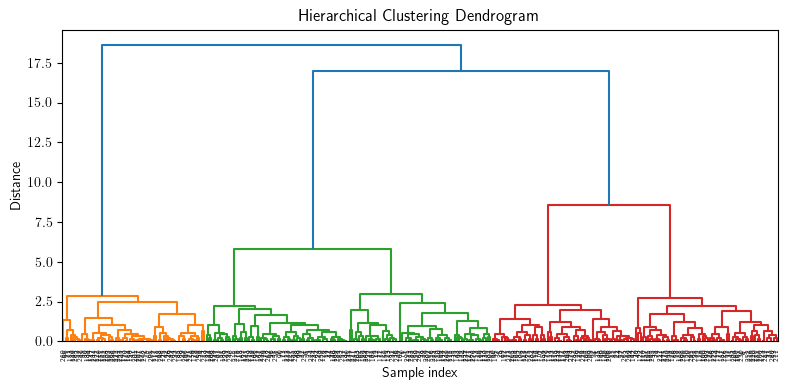

Cluster labels: [3 2 3 2 3 3 2 1 3 2 2 3 2 3 2 3 2 2 2 3 3 2 3 2 2 3 1 2 2 1 3 2 2 3 1 2 2
 2 3 2 3 2 1 3 2 3 3 1 2 1 3 2 1 3 3 3 2 3 3 1 3 3 2 2 1 2 1 1 1 1 2 1 3 2
 3 3 3 3 2 3 1 3 3 2 3 1 3 2 2 2 2 2 3 2 3 3 2 3 2 2 3 3 2 1 3 3 3 2 3 2 3
 2 2 2 3 3 3 1 3 3 3 1 3 3 3 1 2 2 3 3 2 3 2 3 3 3 3 2 1 2 3 3 3 2 2 3 2 1
 2 1 2 1 1 2 3 2 1 3 3 2 3 3 2 2 3 3 2 2 2 2 1 3 2 2 3 2 3 2 1 1 3 3 2 1 1
 2 3 3 1 2 2 1 3 1 1 3 3 1 2 2 3 1 2 2 3 3 3 1 1 3 1 3 2 1 3 2 3 3 1 2 3 3
 2 3 2 2 3 2 3 2 3 2 2 1 2 2 2 2 2 3 3 2 1 2 1 3 2 2 1 1 2 2 3 1 3 2 1 2 1
 2 1 3 2 2 2 3 2 2 1 2 3 1 1 3 3 3 2 2 2 2 3 3 3 2 2 1 1 1 2 2 3 2 1 3 3 3
 1 3 2 3]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


Z = linkage(data, method='complete')  # 'ward', 'single', 'complete', 'average'

# Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index") 
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Optionally, get cluster assignments (e.g., 3 clusters)
labels = fcluster(Z, t=3, criterion='maxclust')
print("Cluster labels:", labels)


# PCA


Principal component analysis is a dimensionality reduction technique, where the data is linearly transformed into a new coordinate system, capable of capturing the variance of the data. The exercise of PCA is to find the orthogonal unit vectors($p_i$), which forms the basis of new coordinate system. These are given by the eigenvectors of the covariance matrix of the data. To make our life easier let us consider a 2 dimensional data set, with variables, $x$ and $y$. We generate a data following a linear equation($y=.25x$), but has a normal distribution with uneven variance for both variables(projections on axes). 

The basis vectors for the new coordiante system is given by the eigenvectors of the covariance matrix of $x$ and $y$. 
$$ M = \begin{bmatrix} \text{cov}(xx) & \text{cov}(xy) \\ \text{cov}(yx) & \text{cov}(yy) \end{bmatrix}$$
As we digonalize this matrix, we get the orthogonal base vectors, which forms the basis of a new coodinate system, where the variance is maximum. 

(array([ 1.,  4.,  4.,  1.,  9.,  8., 15., 14., 13., 10., 17., 28., 33.,
        48., 42., 50., 53., 69., 48., 69., 61., 53., 49., 49., 36., 34.,
        33., 25., 27., 17., 17., 18., 10., 12.,  9.,  3.,  5.,  2.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.97188934, -2.81790116, -2.66391298, -2.50992479, -2.35593661,
        -2.20194842, -2.04796024, -1.89397205, -1.73998387, -1.58599569,
        -1.4320075 , -1.27801932, -1.12403113, -0.97004295, -0.81605477,
        -0.66206658, -0.5080784 , -0.35409021, -0.20010203, -0.04611385,
         0.10787434,  0.26186252,  0.41585071,  0.56983889,  0.72382708,
         0.87781526,  1.03180344,  1.18579163,  1.33977981,  1.493768  ,
         1.64775618,  1.80174436,  1.95573255,  2.10972073,  2.26370892,
         2.4176971 ,  2.57168528,  2.72567347,  2.87966165,  3.03364984,
         3.18763802,  3.34162621,  3.49561439,  3.64960257,  3.80359076,
         3.95757894,  4.11156713,  4.26555531,  4.41954349,

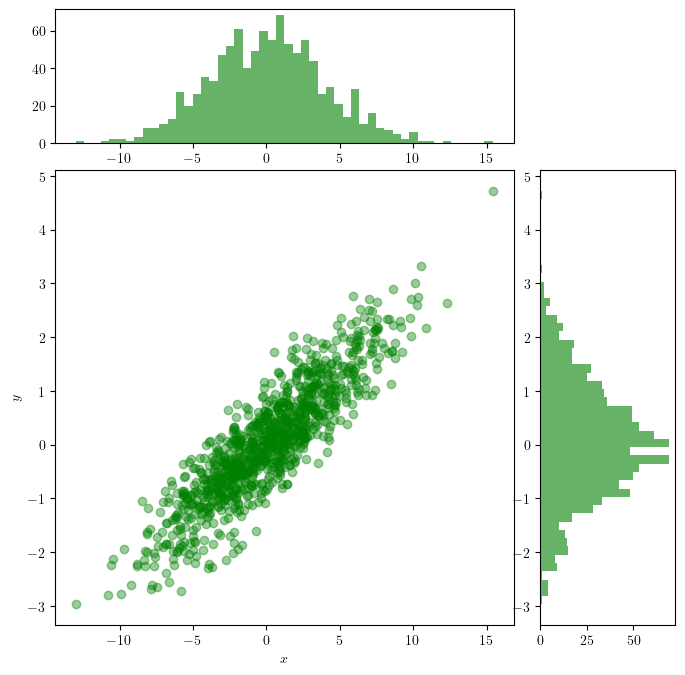

In [2]:
n=1000
np.random.seed(42)
x = np.random.normal(loc=0, scale=4, size=n)
y = 0.25 * x + np.random.normal(loc=0, scale=0.5, size=n)
data = np.vstack((x, y)).T



fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4)
ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_xproj = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_yproj = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

ax_main.plot(x, y, 'o', alpha=.4, color='green')
ax_main.set_xlabel('$x$')
ax_main.set_ylabel('$y$')


ax_xproj.hist(x, bins=50, color='green', alpha=0.6)
# ax_xproj.axis('off')
ax_yproj.hist(y, bins=50, orientation='horizontal', color='green', alpha=0.6)
# ax_yproj.axis('off')



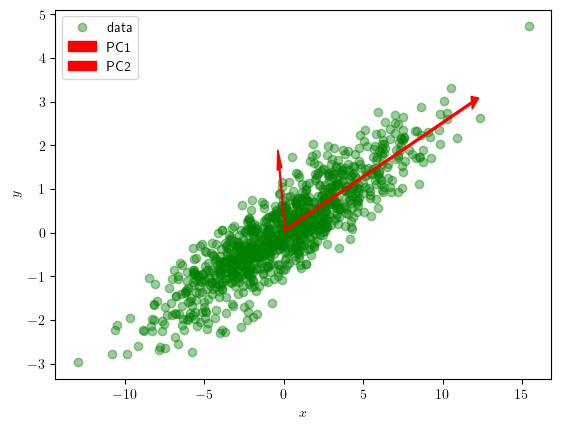

In [3]:
def PCA(data):
    covmat = np.cov(data.T)
    eigvals, eigvecs = np.linalg.eig(covmat)
    idx = np.argsort(-eigvals)
    eigvals2= eigvals[idx]
    eigvecs2 = eigvecs[:, idx]
    
    return(eigvecs2, eigvals2)


eigvecs, eigvals = PCA(data)

mean = np.mean(data, axis=0)
data_centered = data - mean#centering data
plt.plot(x, y, 'o', alpha=.4, color='green', label='data')
plt.xlabel('$x$')
plt.ylabel('$y$')

origin=mean
for i in range(2):
    vec = eigvecs[:, i] * np.sqrt(eigvals[i]) * 3  # scale for visibility
    plt.arrow(mean[0], mean[1], vec[0], vec[1],
              width=0.05, head_width=0.3,
              label=f'PC{i+1}', color='red',zorder=10)

plt.legend()